# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# df.loc[(df['Temperature'] > 70) & (df['Wind Speed'] < 10)]
#nearest airport activity

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities

cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['kenai',
 'nizhneyansk',
 'new norfolk',
 'hatillo',
 'chernoyerkovskaya',
 'leningradskiy',
 'albany',
 'lorengau',
 'buala',
 'mys shmidta',
 'kaitangata',
 'saint-philippe',
 'saldanha',
 'taolanaro',
 'hobart',
 'alice springs',
 'amderma',
 'novikovo',
 'victoria',
 'meulaboh',
 'clyde river',
 'akyab',
 'castro',
 'huarmey',
 'najran',
 'tourlaville',
 'isangel',
 'suamico',
 'punta arenas',
 'torbay',
 'rikitea',
 'bluff',
 'faanui',
 'bethel',
 'kondinskoye',
 'luderitz',
 'busselton',
 'saint george',
 'betsiamites',
 'norman wells',
 'honiara',
 'nizwa',
 'harper',
 'senno',
 'upernavik',
 'yellowknife',
 'bredasdorp',
 'puerto ayora',
 'saskylakh',
 'kodiak',
 'jamestown',
 'mana',
 'ribeira grande',
 'salta',
 'vaini',
 'barrow',
 'bolungarvik',
 'barentsburg',
 'chagda',
 'kaniama',
 'constitucion',
 'butaritari',
 'livenka',
 'port alfred',
 'marcona',
 'grand gaube',
 'aklavik',
 'avarua',
 'qaanaaq',
 'cacule',
 'portomaggiore',
 'almaznyy',
 'kayerkan',
 'eyl',
 'mand

In [15]:
city1 = 'jamestown'
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
test_url = f'{url}appid={weather_api_key}&units={units}&q=' + city1
output = requests.get(test_url).json()
output


{'coord': {'lon': -79.2353, 'lat': 42.097},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 29.53,
  'feels_like': 18.12,
  'temp_min': 28.4,
  'temp_max': 30.99,
  'pressure': 1009,
  'humidity': 69},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 310},
 'clouds': {'all': 1},
 'dt': 1612387625,
 'sys': {'type': 1,
  'id': 4588,
  'country': 'US',
  'sunrise': 1612355256,
  'sunset': 1612391637},
 'timezone': -18000,
 'id': 5122534,
 'name': 'Jamestown',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
import time
city_name = []
country = []
date = []
lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloudiness = []

url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    try:
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        time.sleep(1.1)
        city_name.append(city)
        print(response['name'])
    except KeyError: 
        print('Skipping city...')
        


Kenai
Skipping city...
New Norfolk
Hatillo
Chernoyerkovskaya
Leningradskiy
Albany
Lorengau
Buala
Skipping city...
Kaitangata
Saint-Philippe
Saldanha
Skipping city...
Hobart
Alice Springs
Skipping city...
Novikovo
Hong Kong
Meulaboh
Clyde River
Sittwe
Castro
Huarmey
Najrān
Tourlaville
Isangel
Suamico
Punta Arenas
Torbay
Rikitea
Bluff
Faanui
Bethel
Kondinskoye
Lüderitz
Busselton
Saint George
Betsiamites
Norman Wells
Honiara
Nizwá
Harper
Senno
Upernavik
Yellowknife
Bredasdorp
Puerto Ayora
Saskylakh
Saint Paul Harbor
Jamestown
Mana
Ribeira Grande
Salta
Vaini
Barrow
Skipping city...
Skipping city...
Skipping city...
Kaniama
Constitución
Butaritari
Livenka
Port Alfred
Skipping city...
Grand Gaube
Aklavik
Avarua
Qaanaaq
Caculé
Portomaggiore
Almaznyy
Kayerkan
Eyl
Mandalgovi
Ajdabiya
Bud
Chapais
Kapaa
Husavik
Evensk
Port Elizabeth
Dikson
Praia da Vitória
Sørland
Dehlorān
Hilo
Sault Ste. Marie
Skipping city...
Skipping city...
Presidente Epitácio
Bambanglipuro
Yanam
Goderich
Mocuba
Mataura
Chui


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#city_total_df must take cities and output only the data from city_names. cities has all humidity, temp, etc. data.
cities_df = pd.DataFrame({'City': city_name, 
                          'Country': country, 
                          'Date': date, 
                          'Latitude': lat, 
                          'Longitude': lng, 
                          'Temperature': temp, 
                          'Humidity': humidity, 
                          'Wind Speed': wind_speed, 
                          'Cloudiness': cloudiness})
cities_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,kenai,US,1612387925,60.5544,-151.2583,15.80,92,5.75,90
1,new norfolk,AU,1612387927,-42.7826,147.0587,59.00,89,4.00,70
2,hatillo,PR,1612387928,18.4863,-66.8254,82.99,75,1.01,25
3,chernoyerkovskaya,RU,1612387929,45.4331,37.7686,50.00,76,4.47,85
4,leningradskiy,RU,1612387682,69.3833,178.4167,-24.56,84,11.14,65


In [18]:
#use this csv for vacation py!!!!!
cities_df.to_csv('city_clean.csv')

In [19]:
cities_df.describe()

,Date,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
count,5.720000e+02,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.612388e+09,21.132479,16.670257,48.997727,73.571678,8.229318,52.571678
std,2.391827e+02,33.535646,89.564054,32.576224,19.732895,6.093355,39.770842
min,1.612387e+09,-54.800000,-179.166700,-47.200000,9.000000,0.290000,0.000000
25%,1.612388e+09,-7.686000,-61.724400,30.000000,65.000000,3.850000,3.000000
50%,1.612388e+09,26.916650,25.280350,59.000000,78.000000,6.910000,61.500000
75%,1.612388e+09,48.494225,93.037500,75.990000,88.000000,11.500000,90.000000
max,1.612389e+09,78.218600,178.416700,96.800000,100.000000,39.950000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.
hum_cities = cities_df.loc[cities_df["Humidity"] > 100]
hum_cities

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

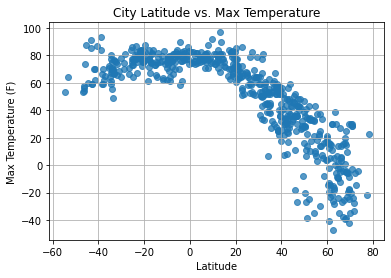

In [21]:
plt.scatter(cities_df['Latitude'], cities_df['Temperature'], alpha = .75)
plt.savefig('Lat_Temp.png')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

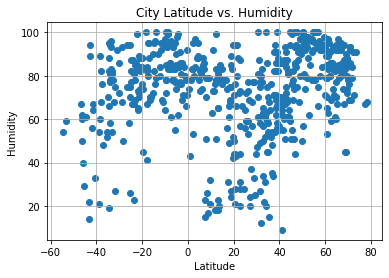

In [22]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.savefig('Lat_Hum.png')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

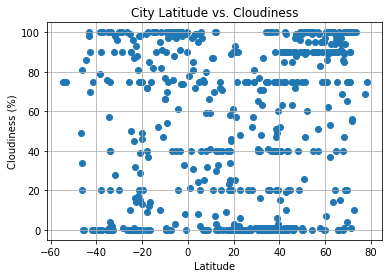

In [23]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.savefig('Lat_Cloud.png')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.show()
plt.show()

## Latitude vs. Wind Speed Plot

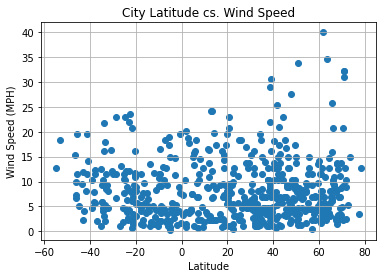

In [24]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.savefig('Lat_Wind.png')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude cs. Wind Speed')
plt.grid()
plt.show()
plt.show()

## Linear Regression

In [25]:
s_df = cities_df.loc[cities_df['Latitude'] < 0]
n_df = cities_df.loc[cities_df['Latitude'] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

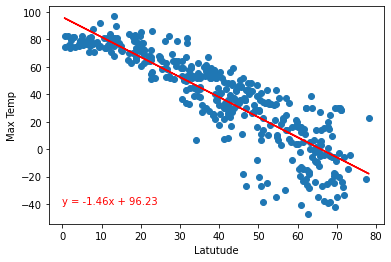

In [27]:
x_values = n_df['Latitude']
y_values = n_df['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0,-40), fontsize = 10, color="red")
plt.xlabel('Latutude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

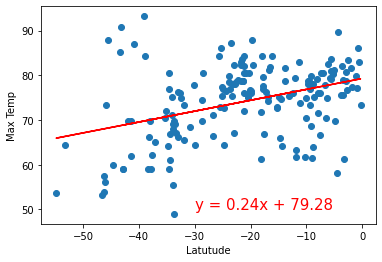

In [29]:
x_values = s_df['Latitude']
y_values = s_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

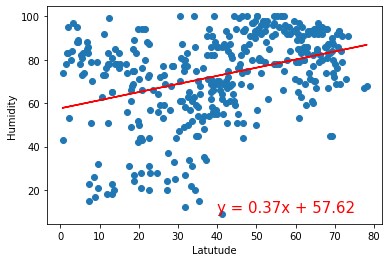

In [30]:
x_values = n_df['Latitude']
y_values = n_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

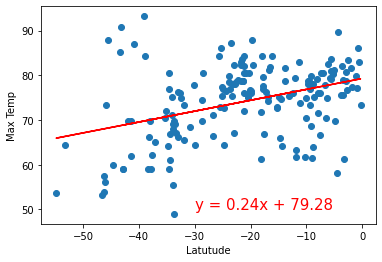

In [32]:
x_values = s_df['Latitude']
y_values = s_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

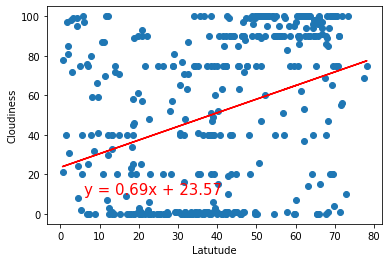

In [33]:
x_values = n_df['Latitude']
y_values = n_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

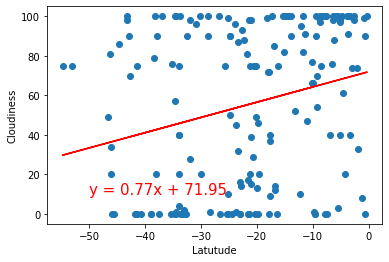

In [34]:
x_values = s_df['Latitude']
y_values = s_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

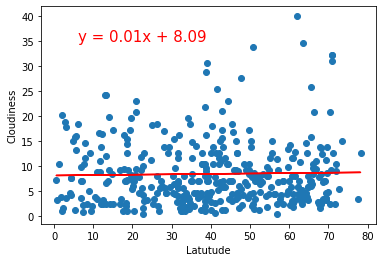

In [38]:
x_values = n_df['Latitude']
y_values = n_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,35),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

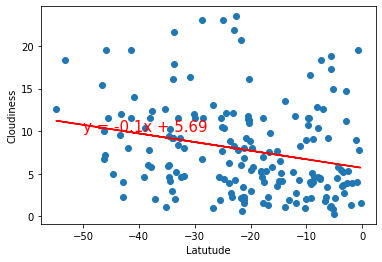

In [39]:
x_values = s_df['Latitude']
y_values = s_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latutude')
plt.ylabel('Cloudiness')
plt.show()